## Installing YOLOv4/Darknet
=============================================

### Step 1: Install the Prerequisite

1. **CMake:** Download and Install Cmake from the Link. [[https://cmake.org/download/](https://cmake.org/download/)]
2. **CUDA:** Download and Install CUDA from the Link. [[https://developer.nvidia.com/cuda-downloads](https://developer.nvidia.com/cuda-downloads)]
3. **cuDNN:** Download and Install cuDNN from the Link. [[https://developer.nvidia.com/cudnn-download-survey](https://developer.nvidia.com/cudnn-download-survey)]
4. **OpenCV:** Run `pip install opencv-python` and Install OpenCV
5. **Visual Studio Community Edition:** Download Visual Studio from the Link and Install [[Microsoft Visual Studio Community Edition]](https://visualstudio.microsoft.com/thank-you-downloading-visual-studio/?sku=Community&rel=16)
    - While installing, Make Sure you choose **_Desktop Development with C++_** under the **Workloads** tab
6. **Powershell Command:** Open Powershell and execute the following command `Set-ExecutionPolicy unrestricted -Scope CurrentUser -Force`

### Step 2: Preparation for Installing Darknet

1. Open `install_darknet.py` in your favorite editor.
2. Find `VIRTUAL_ENV` and replace the value depending on your environment.
    - If you are using a Virtual Environment, set the **name of the environment** as the value of `VIRTUAL_ENV`
    - If you are not using any virtual environment, left the value of `VIRTUAL_ENV` blank

### Step 3: Installing Darknet

Go into the project directory and open powershell in the current folder. Now run `python install_darknet.py` to start installing darknet. As the installation may take a long time (1-2 hours), please don't panic and stop the execution of the script.

### Step 4: Removing the Garbage Files

After successfully installing the Darknet, Please check the followings:

1. Your project directory should contain `darknet` folders inside.
2. Start powershell in the project directory and run `python` to start interactive shell. Then try to import darknet using `import darknet`. If you don't see any error, Your installation is successful.

After successful running of the script, you will see a Windows explorer pop up from where delete the **darknet** folder.

**Congratulations, You can now use Darknet in your Projects**

## Detecting Objects Using Pre-Trained Model
===============================================================

1. Download Pre-Trained Configuration File From This Link: [https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg](https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg)
2. Put the Configuration File in the **`darknet\cfg`** Directory.
3. Download Pre-Trained Weights File from This Link: [https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights](https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights)
4. Put the Weights File in the **`darknet\`** Directory

### Importing Libraries

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import glob

from darknet import darknet

### Defining Directories

In [2]:
project_dir = os.getcwd()
darknet_dir = os.path.join(project_dir, 'darknet')
data_dir = os.path.join(project_dir, 'data')

if not os.path.exists(data_dir):
    os.makedirs(data_dir, exist_ok=True)

### Loading YOLOv4 Network

In [4]:
os.chdir(darknet_dir)
network, class_names, class_colors = darknet.load_network(
    'cfg/yolov4.cfg',
    'cfg/coco.data',
    'yolov4.weights'
)

### Loading Image for Detection

In [5]:
image_location = 'data/dog.jpg'

width = darknet.network_width(network)
height = darknet.network_height(network)
darknet_image = darknet.make_image(width, height, 3)

image = cv2.imread(image_location)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (width, height), interpolation=cv2.INTER_LINEAR)
darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())

369664

### Detecting Objects in the Image

In [6]:
detections = darknet.detect_image(network, class_names, darknet_image, thresh=0.35)
darknet.free_image(darknet_image)

1

In [7]:
print(detections)

[('truck', '91.8', (454.57421875, 130.06637573242188, 174.901611328125, 98.58246612548828)), ('bicycle', '92.38', (271.9219970703125, 292.3072814941406, 362.61602783203125, 315.59527587890625)), ('dog', '97.91', (174.85946655273438, 404.4503173828125, 146.0295867919922, 333.9118347167969))]


### Saving the Viewing the Image

In [8]:
os.chdir(project_dir)
image = darknet.draw_boxes(detections, image_resized, class_colors)
cv2.imwrite('output.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

True

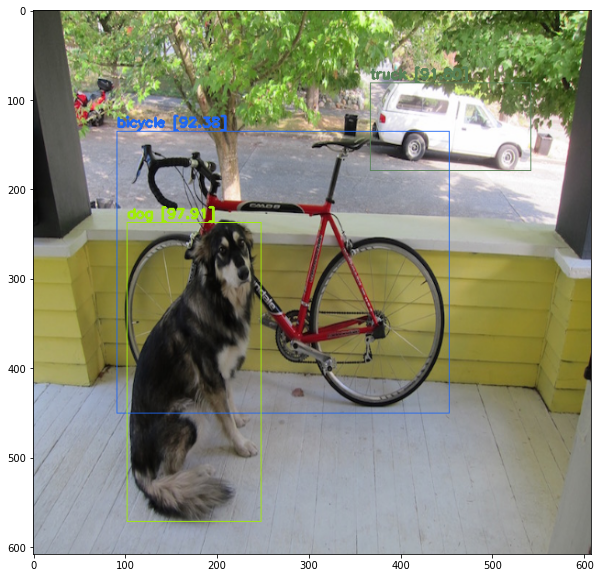

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(image, aspect='auto')
plt.show()

## Custom Object Detection
===========================================

### Preparing Custom Configuration File

- Keep the **`batch_size`** small if you have low number of training images
- Change **`num_of_classes`** with the number of classes for your training datasets
- **`width_height`** should be any value multiple of 32. Keep it small if got memory error.

In [3]:
batch_size = 32
subdivision=64
num_of_classes = 4
width_height=320

In [11]:
custom_cfg_template = 'cfg/yolov4-custom.cfg'
custom_cfg = 'cfg/yolov4-obj.cfg'

os.chdir(darknet_dir)

cfg_obj = open(custom_cfg, 'w')

with open(custom_cfg_template, 'r') as cfg:
    line_number = 1
    for line in cfg.readlines():
        if line.split("=")[0] == 'batch':
            line = line.split("=")
            line[-1] = str(batch_size)
            line = " = ".join(line)
            cfg_obj.write(line+'\n')

        elif line.split("=")[0] == 'subdivisions':
            line = line.split("=")
            line[-1] = str(subdivision)
            line = " = ".join(line)
            cfg_obj.write(line+'\n')

        elif line.split("=")[0] in ('width', 'height'):
            line = line.split("=")
            line[-1] = str(width_height)
            line = '='.join(line)
            cfg_obj.write(line+'\n')

        elif 'max_batches' in line:
            line = [value.strip() for value in line.split("=")]
            line[-1] = str(num_of_classes*2000)
            line = " = ".join(line)
            cfg_obj.write(line+'\n')

        elif line.split("=")[0] == 'steps':
            line = line.split("=")
            steps = line[-1].split(",")
            steps[0] = str(int(num_of_classes*2000*0.8))
            steps[-1] = str(int(num_of_classes*2000*0.9))
            line[-1] = ",".join(steps)
            line = "=".join(line)
            cfg_obj.write(line+'\n')

        elif "classes" in line:
            line = line.split("=")
            line[-1] = str(num_of_classes)
            line = '='.join(line)
            cfg_obj.write(line+'\n')

        elif line_number in (963, 1139, 1051):
            line = line.split("=")
            line[-1] = str((num_of_classes+5)*3)
            line = "=".join(line)
            cfg_obj.write(line+'\n')

        else:
            cfg_obj.write(line)


        line_number+=1
        

cfg_obj.close()

### Preparing Datasets

1. Download Necessary Images and Use **[labelIMG](https://github.com/tzutalin/labelImg)** to prepare data for YOLOv4 [[Tutorial](https://www.youtube.com/watch?v=1d7u8wTmA80)]
2. Put the images and text files in the `data` directory in your `project root` folder. (Not inside `darknet` folder) 

In [20]:
class_names = open(os.path.join(data_dir, 'classes.names'), 'w')

with open(os.path.join(data_dir, 'classes.txt'), 'r') as class_txt:
    for each_class in class_txt:
        class_names.write(each_class)

class_names.close()

In [21]:
source_data = open(os.path.join(data_dir, 'source_data.data'), 'w')

source_data.write(f"classes = {num_of_classes}\n")
source_data.write("train = data\\train.txt\n")
source_data.write("valid = data\\test.txt\n")
source_data.write("names = data\\classes.names\n")
source_data.write("backup = backup")

source_data.close()

if not os.path.exists(os.path.join(project_dir, 'backup')):
    os.mkdir(os.path.join(project_dir, 'backup'))

In [6]:
image_types = ['*.jpg', '*.jpeg', '*.png']
images = []

for type in image_types:
    images.extend(glob.glob(f"{data_dir}/{type}"))
    
images.sort()
images = [image + '\n' for image in images]

test_data = images[:int(len(images)*0.15)]
train_data = images[int(len(images)*0.15):]

In [7]:
train_txt = open(os.path.join(data_dir, 'train.txt'), 'w')
test_txt = open(os.path.join(data_dir, 'test.txt'), 'w')

for data in train_data:
    train_txt.write(data)

for data in test_data:
    test_txt.write(data)

train_txt.close()
test_txt.close()

### Starting Training for Custom Object Detection

1. Download Weights File from this link. [https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137](https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137)
2. Put the `yolov4.conv.137` weights file in the `darknet\` directory.